In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from vae import VAE

import torch
from torch.utils.data import Dataset
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [58]:
!tree lightning_logs

lightning_logs
├── version_0
│   ├── checkpoints
│   │   └── epoch=55.ckpt
│   ├── events.out.tfevents.1598816904.beast.20385.0
│   └── hparams.yaml
├── version_1
│   ├── events.out.tfevents.1598821503.beast.27693.0
│   └── hparams.yaml
└── version_2
    ├── checkpoints
    │   └── epoch=3.ckpt
    ├── events.out.tfevents.1598821579.beast.27807.0
    └── hparams.yaml

5 directories, 8 files


In [59]:
vae = VAE.load_from_checkpoint("lightning_logs/version_2/checkpoints/epoch=3.ckpt")
vae.eval();

In [60]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [65]:
example = 4

In [66]:
img = ds[example][0]
with torch.no_grad():
    x = vae.encoder(img.unsqueeze(0))
    mu = vae.fc_mu(x)
    reconst = vae.decoder(mu).squeeze()

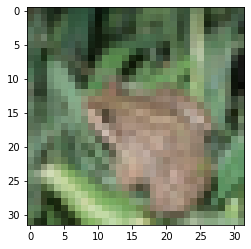

In [67]:
plt.imshow(img.permute(1, 2, 0).numpy())

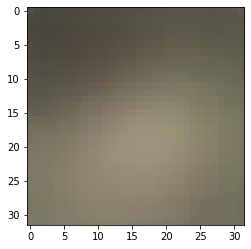

In [68]:
plt.imshow(reconst.permute(1, 2, 0).numpy())

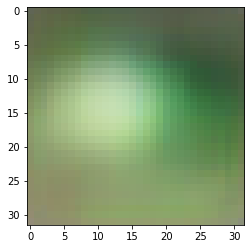

In [70]:
with torch.no_grad():
    z = torch.randn_like(mu)
    gen = vae.decoder(z).squeeze()
    
plt.imshow(gen.permute(1, 2, 0).numpy())

In [13]:
def tsne(model, dataset):
    dl = DataLoader(dataset, batch_size=64, num_workers=8)
    for (x, y) in dl:
        mu, _, _ = model.encode(x)
    